## Complex Urban Systems
### Assignment 2

<b> Question 3

From https://ghsl.jrc.ec.europa.eu/ghs\_stat\_ucdb2015mt\_r2019a.php, download the associated csv file and perform a scaling analysis between the total population in 2015 and the urban center extension for the following nations: USA, Canada, Poland, and Russia. In your analysis, please exclude any city with less than 100 km2 in area. Does the analysis match your expectations? Please explain your findings.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.csv', encoding='ISO-8859-1',low_memory=False)
data.head()

,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,...,EX_SS_P90,EX_SS_P00,EX_SS_P15,EX_EQ19PGA,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX
0,1.0,1.0,185.0,21.247683,-158.043016,21.422193,-157.730529,21.340678,-157.893497,United States,...,327680.8315,397443.0314,444041.5295,NAN,NAN,missing,NAN,0.074385203,0.226415,56.41
1,2.0,2.0,42.0,-17.641184,-149.628088,-17.517631,-149.508018,-17.534103,-149.568053,French Polynesia,...,0.0000,0.0000,0.0000,NAN,NAN,missing,NAN,0.127997212,0.284119,NAN
2,3.0,1.0,55.0,34.858517,-120.475511,34.989334,-120.389183,34.923123,-120.434372,United States,...,0.0000,0.0000,0.0000,0,0,available,2.791739941,0.481144026,0.040129,23.64
3,4.0,1.0,48.0,36.582997,-121.952215,36.635743,-121.811816,36.607720,-121.882378,United States,...,0.0000,0.0000,0.0000,0,0,available,NAN,0.444839872,0.138683,42.17
4,5.0,1.0,60.0,34.388220,-119.853855,34.457831,-119.658413,34.427664,-119.743693,United States,...,0.0000,0.0000,0.0000,0,0,available,4.255020142,0.55676245,0.061348,36.5


In [3]:
data1 = data[['CTR_MN_NM','UC_NM_MN','P15','BBX_LATMN','BBX_LATMX','BBX_LONMN','BBX_LONMX','AREA']]
countries = ['United States', 'Canada', 'Poland', 'Russia']
data1 = data1[data1['CTR_MN_NM'].isin(countries)]
data1 = data1[data1['AREA']>=100]
data1.head()

,CTR_MN_NM,UC_NM_MN,P15,BBX_LATMN,BBX_LATMX,BBX_LONMN,BBX_LONMX,AREA
0,United States,Honolulu,5.128537e+05,21.247683,21.422193,-158.043016,-157.730529,185.0
7,United States,Oxnard,2.978064e+05,34.136065,34.292542,-119.321251,-119.121006,136.0
9,United States,San Jose,4.604961e+06,37.199214,38.065113,-122.530399,-121.734265,1717.0
11,United States,Thousand Oaks,1.463563e+05,34.136065,34.231676,-118.993479,-118.730942,105.0
13,United States,Los Angeles,1.428172e+07,33.389946,34.327329,-118.675643,-117.111532,5633.0


In [4]:
data1['CTR_MN_NM'].unique()

array(['United States', 'Canada', 'Poland', 'Russia'], dtype=object)

In [5]:
data1.shape

(216, 8)



 United States
Intercept: -5.036636236695314
Coefficient: 0.8342868837859487
R^2: 0.9313119228493343
Sublinear relationship


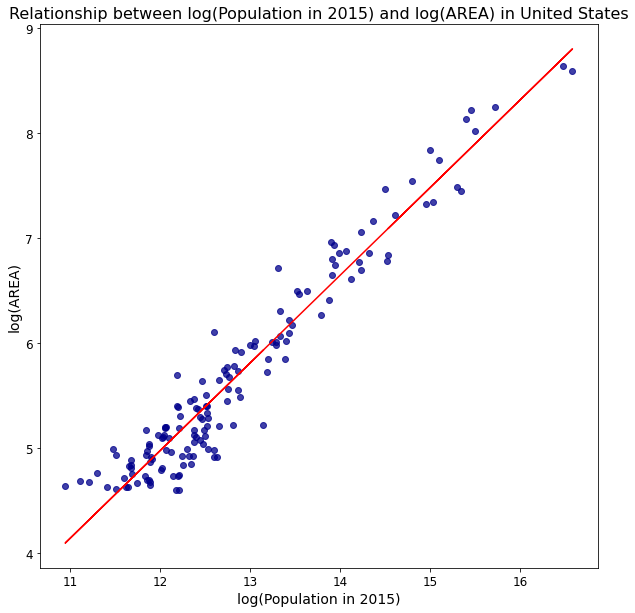



 Canada
Intercept: -6.25676946786586
Coefficient: 0.889359630243167
R^2: 0.9923562716968196
Sublinear relationship


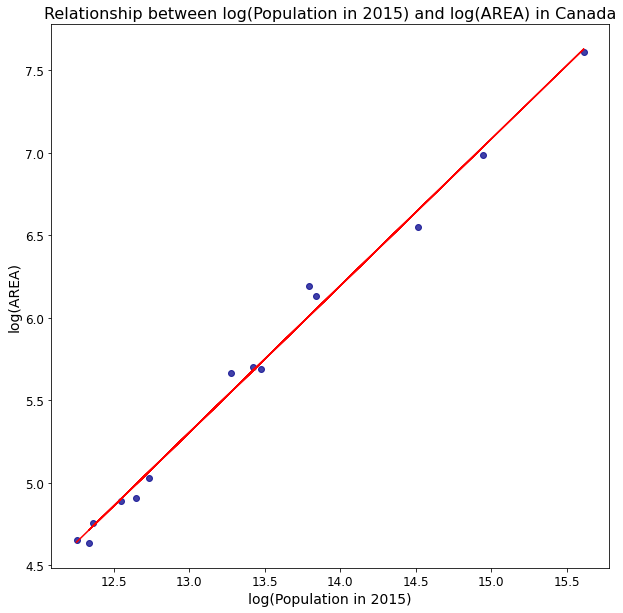



 Poland
Intercept: -7.974310871947761
Coefficient: 0.988887124217453
R^2: 0.8765464831894277
Sublinear relationship


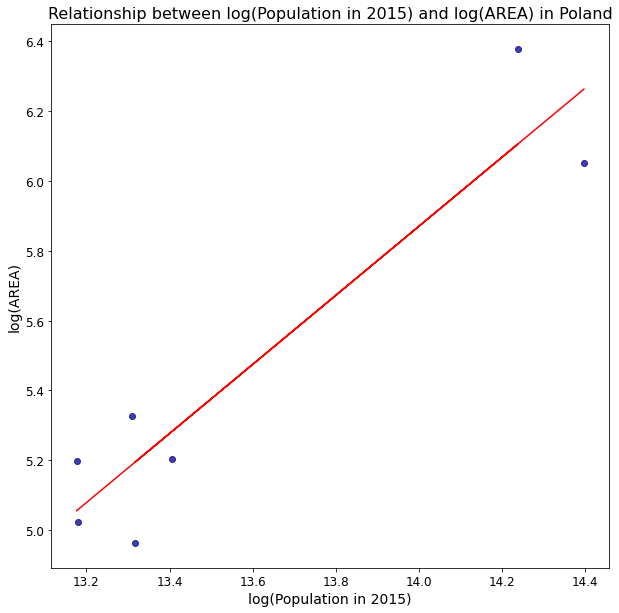



 Russia
Intercept: -3.7237621335524933
Coefficient: 0.6667213924716087
R^2: 0.8631859543474508
Sublinear relationship


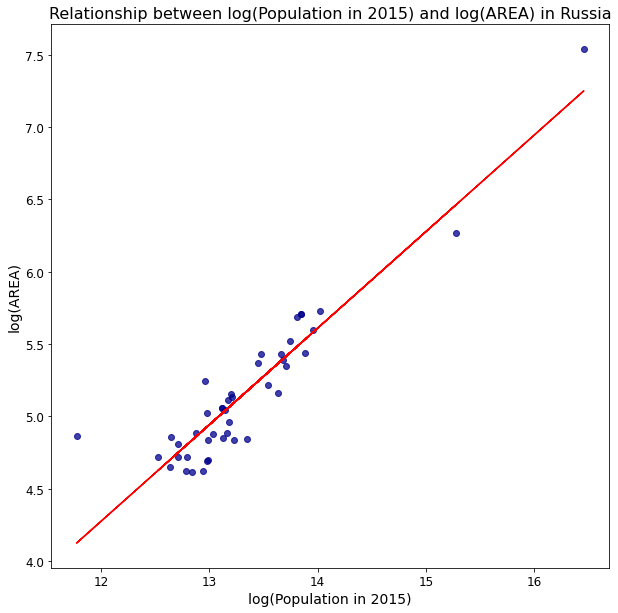



All 4 Countries
Intercept: -4.143808264706207
Coefficient: 0.7468159086791123
R^2: 0.7586324868929072
Sublinear relationship


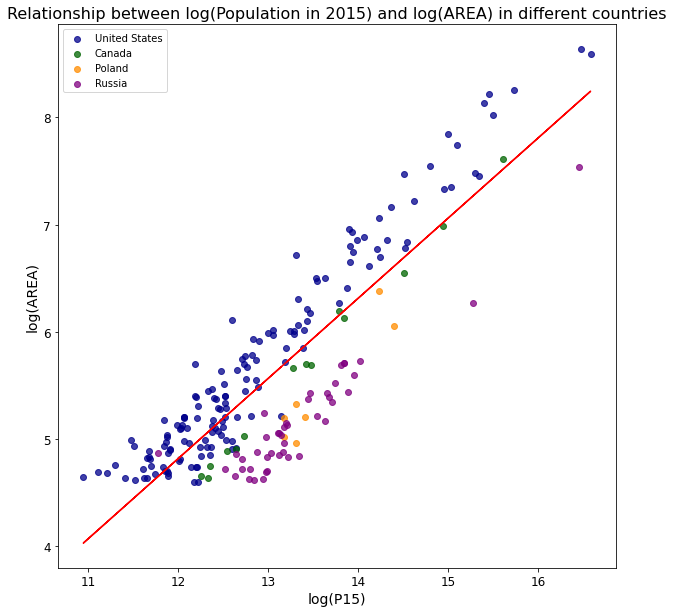

In [6]:
data1 = data1[['P15', 'AREA', 'CTR_MN_NM']].dropna()

import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

for country in countries:
    data_country = data1[data1['CTR_MN_NM'] == country]
    data_log = data_country[['P15', 'AREA']].dropna().apply(np.log)
    X = data_log['P15'].values.reshape(-1, 1)
    y = data_log['AREA']
    model = LinearRegression().fit(X, y)
    print("\n\n",country)
    print('Intercept:', model.intercept_)
    print('Coefficient:', model.coef_[0])
    print('R^2:', model.score(X, y))
    if model.coef_[0] == 1:
        print('Linear relationship')
    elif model.coef_[0] < 1:
        print('Sublinear relationship')
    else:
        print('Superlinear relationship')
    plt.figure(figsize=(10, 10))
    plt.scatter(X, y, alpha=0.75, color='darkblue')
    plt.plot(X, model.predict(X), color='red')
    plt.xlabel('log(Population in 2015)', fontsize=14)
    plt.ylabel('log(AREA)', fontsize=14)
    plt.title('Relationship between log(Population in 2015) and log(AREA) in ' + country, fontsize=16)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()

    
data_log = data1[['P15', 'AREA', 'CTR_MN_NM']].dropna()
data_log['P15'] = np.log(data_log['P15'])
data_log['AREA'] = np.log(data_log['AREA'])


X = data_log['P15'].values.reshape(-1, 1)
y = data_log['AREA']
model = LinearRegression().fit(X, y)
print("\n\nAll 4 Countries")
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])
print('R^2:', model.score(X, y))
if model.coef_[0] == 1:
    print('Linear relationship')
elif model.coef_[0] < 1:
    print('Sublinear relationship')
else:
    print('Superlinear relationship')

countries_colors = {'United States': 'darkblue', 'Canada': 'darkgreen', 'Poland': 'darkorange', 'Russia': 'purple'}
data_log['color'] = data_log['CTR_MN_NM'].map(countries_colors)
fig, ax = plt.subplots(figsize=(10, 10))
for country, color in countries_colors.items():
    data_country = data_log[data_log['CTR_MN_NM'] == country]
    plt.scatter(data_country['P15'], data_country['AREA'], alpha=0.75, color=color, label=country)
plt.plot(X, model.predict(X), color='red')
plt.xlabel('log(P15)', fontsize=14)
plt.ylabel('log(AREA)', fontsize=14)
plt.title('Relationship between log(Population in 2015) and log(AREA) in different countries', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.legend()
plt.show()


<b> Question 6

Consider the classical (compartmental) SIR model discussed in class for the following parameters β = 0.3, γ = 0.1, and N = 10, 000. Simulate the model and plot the three variables from t = 0 to 200 for the case in which there is only one infected subject at the beginning of the infection and nobody is immune to the disease.

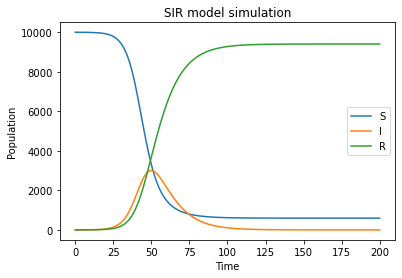

At t=0:
S =  9999.0
I =  1.0
R =  0.0

At t=200:
S =  595.1358608053775
I =  0.02864570401681712
R =  9404.835493490615

Maximum value of I =  3004.8159818370027


In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Initial
S0 = 9999
I0 = 1
R0 = 0


beta = 0.3
gamma = 0.1
N = 10000


t = np.linspace(0, 200, 201)


def sir(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = (-beta/N) * I * S
    dIdt = (beta/N) * I * S - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]


sol = odeint(sir, [S0, I0, R0], t, args=(beta, gamma, N))


plt.plot(t, sol[:, 0], label='S')
plt.plot(t, sol[:, 1], label='I')
plt.plot(t, sol[:, 2], label='R')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR model simulation')
plt.show()


print("At t=0:")
print("S = ", sol[0, 0])
print("I = ", sol[0, 1])
print("R = ", sol[0, 2])
print("")

print("At t=200:")
print("S = ", sol[-1, 0])
print("I = ", sol[-1, 1])
print("R = ", sol[-1, 2])
print("")


Imax = np.max(sol[:, 1])
print("Maximum value of I = ", Imax)


<b> Question 7

For the same SIR considered above. Compute the reproductive number and the effective reproductive number. Would you expect the disease to be epidemic? If so, does this match the numerical results? What do you think is a disease with a similar behavior? Please compute analytically the peak number of infections and compare with simulations. Also, please compute the steady-state number of susceptible individuals by solving the associated implicit equation and compare with numerical results.

In [8]:
import math
from scipy.optimize import root_scalar

def solve_for_S_inf(R0, N):
    def equation(S_inf):
        return math.log(S_inf/N) - R0 * ((S_inf-N)/N)
    
    sol = root_scalar(equation, bracket=[1, N/10])  
    S_inf = sol.root
    
    return S_inf


R0 = 3
N = 10000
S_inf = solve_for_S_inf(R0, N)
print("S_inf =", S_inf)

S_inf = 595.2020929264039


<b> Question 8

Create any scale-free network of your choice with at least 100 nodes. Plot the degree distribution and compute the mean degree < k > and the second moment of the degree < k2 >

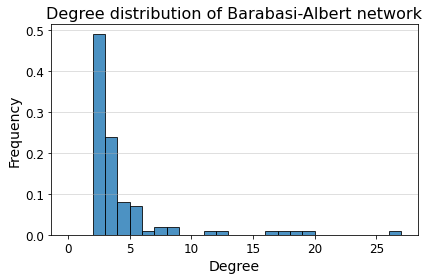

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

ba = nx.barabasi_albert_graph(100, 2)

degrees = [ba.degree(node) for node in ba.nodes()]
plt.hist(degrees, bins=range(max(degrees)+2), density=True, alpha=0.8, edgecolor='black')
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Degree distribution of Barabasi-Albert network', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np

mean_degree = np.mean(degrees)
print(f"Mean degree: {mean_degree:.2f}")

second_moment = np.mean(np.power(degrees, 2))
print(f"Second moment of degree: {second_moment:.2f}")


Mean degree: 3.92
Second moment of degree: 31.48


<b> Question 9

Create any scale-free network of your choice with at least 100 nodes. Plot the degree distribution and compute the mean degree < k > and the second moment of the degree < k2 >

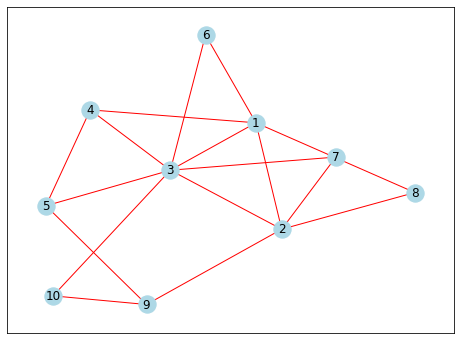

In [16]:
#Plotting the network
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
G.add_edges_from([(1, 2), (1, 3),(1, 4), (1, 6), (1, 8), (2, 3), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 10), (4, 5), (5, 9), (9, 10)])

fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='red')
plt.show()

In [12]:
import math

Hx = math.log(5) + math.log(5-1) + math.log(7-1)
print(Hx)


4.787491742782046
